In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
import seaborn as sns
%matplotlib inline

In [10]:
HR_df = pd.read_csv("HR_train.csv")

In [11]:
HR_df.head()

,area,diff_highest_dbz,diff_max_dbz_bbox_three,diff_total_vil,eccentricity,max_dbz_bbox,max_dbz_bbox_eight,max_dbz_bbox_three,max_dbz_index,storm_type,total_vil,label_HR
0,98.0,-2.0,-0.49,-0.66,0.89,51.47,34.92,51.47,0.0,1.0,11.89,0.0
1,1144.0,0.0,-0.22,-1.74,0.95,46.58,28.16,41.32,2.0,1.0,4.72,0.0
2,507.0,0.0,0.00,3.92,0.86,55.00,48.46,55.00,1.0,1.0,30.55,1.0
3,86.0,0.0,-2.91,-4.26,0.92,48.56,34.65,48.56,0.0,1.0,7.63,0.0
4,588.0,-1.0,0.00,-7.18,0.78,55.00,44.53,55.00,0.0,1.0,23.37,1.0


In [12]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6829 entries, 0 to 6828
Data columns (total 12 columns):
area                       6829 non-null float64
diff_highest_dbz           6829 non-null float64
diff_max_dbz_bbox_three    6829 non-null float64
diff_total_vil             6829 non-null float64
eccentricity               6829 non-null float64
max_dbz_bbox               6829 non-null float64
max_dbz_bbox_eight         6829 non-null float64
max_dbz_bbox_three         6829 non-null float64
max_dbz_index              6829 non-null float64
storm_type                 6829 non-null float64
total_vil                  6829 non-null float64
label_HR                   6829 non-null float64
dtypes: float64(12)
memory usage: 640.3 KB


In [13]:
# storm_df.drop(columns=['label_HR','label_RG','speed'],inplace=True)

In [14]:
HR_df.describe()

,area,diff_highest_dbz,diff_max_dbz_bbox_three,diff_total_vil,eccentricity,max_dbz_bbox,max_dbz_bbox_eight,max_dbz_bbox_three,max_dbz_index,storm_type,total_vil,label_HR
count,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.0,6829.000000,6829.000000
mean,364.156685,-0.086689,-0.068417,-0.703722,0.813024,52.754860,42.683654,50.070452,1.646800,1.0,23.401256,0.457607
std,437.077757,1.347429,6.180886,7.085928,0.134695,3.267465,8.847653,7.607219,1.451424,0.0,15.690970,0.498236
min,40.000000,-10.000000,-55.000000,-58.030000,0.130000,41.560000,0.000000,0.000000,0.000000,1.0,1.990000,0.000000
25%,93.000000,-1.000000,-1.010000,-3.570000,0.750000,50.990000,36.400000,48.140000,0.000000,1.0,10.250000,0.000000
50%,219.000000,0.000000,0.000000,-0.460000,0.850000,55.000000,43.140000,52.640000,2.000000,1.0,20.600000,0.000000
75%,468.000000,0.000000,0.730000,2.170000,0.910000,55.000000,50.070000,55.000000,2.000000,1.0,32.980000,1.000000
max,5517.000000,8.000000,55.000000,56.080000,0.990000,60.100000,55.000000,57.650000,13.000000,1.0,94.810000,1.000000


In [15]:
# # 缺失值处理
# np.any([np.any(pd.isna(storm_df)),np.any(pd.isnull(storm_df))])

In [16]:
# storm_df.dropna(inplace=True)

In [17]:
HR_df.head()

,area,diff_highest_dbz,diff_max_dbz_bbox_three,diff_total_vil,eccentricity,max_dbz_bbox,max_dbz_bbox_eight,max_dbz_bbox_three,max_dbz_index,storm_type,total_vil,label_HR
0,98.0,-2.0,-0.49,-0.66,0.89,51.47,34.92,51.47,0.0,1.0,11.89,0.0
1,1144.0,0.0,-0.22,-1.74,0.95,46.58,28.16,41.32,2.0,1.0,4.72,0.0
2,507.0,0.0,0.00,3.92,0.86,55.00,48.46,55.00,1.0,1.0,30.55,1.0
3,86.0,0.0,-2.91,-4.26,0.92,48.56,34.65,48.56,0.0,1.0,7.63,0.0
4,588.0,-1.0,0.00,-7.18,0.78,55.00,44.53,55.00,0.0,1.0,23.37,1.0


In [18]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6829 entries, 0 to 6828
Data columns (total 12 columns):
area                       6829 non-null float64
diff_highest_dbz           6829 non-null float64
diff_max_dbz_bbox_three    6829 non-null float64
diff_total_vil             6829 non-null float64
eccentricity               6829 non-null float64
max_dbz_bbox               6829 non-null float64
max_dbz_bbox_eight         6829 non-null float64
max_dbz_bbox_three         6829 non-null float64
max_dbz_index              6829 non-null float64
storm_type                 6829 non-null float64
total_vil                  6829 non-null float64
label_HR                   6829 non-null float64
dtypes: float64(12)
memory usage: 640.3 KB


In [19]:
HR_df.describe()

,area,diff_highest_dbz,diff_max_dbz_bbox_three,diff_total_vil,eccentricity,max_dbz_bbox,max_dbz_bbox_eight,max_dbz_bbox_three,max_dbz_index,storm_type,total_vil,label_HR
count,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.0,6829.000000,6829.000000
mean,364.156685,-0.086689,-0.068417,-0.703722,0.813024,52.754860,42.683654,50.070452,1.646800,1.0,23.401256,0.457607
std,437.077757,1.347429,6.180886,7.085928,0.134695,3.267465,8.847653,7.607219,1.451424,0.0,15.690970,0.498236
min,40.000000,-10.000000,-55.000000,-58.030000,0.130000,41.560000,0.000000,0.000000,0.000000,1.0,1.990000,0.000000
25%,93.000000,-1.000000,-1.010000,-3.570000,0.750000,50.990000,36.400000,48.140000,0.000000,1.0,10.250000,0.000000
50%,219.000000,0.000000,0.000000,-0.460000,0.850000,55.000000,43.140000,52.640000,2.000000,1.0,20.600000,0.000000
75%,468.000000,0.000000,0.730000,2.170000,0.910000,55.000000,50.070000,55.000000,2.000000,1.0,32.980000,1.000000
max,5517.000000,8.000000,55.000000,56.080000,0.990000,60.100000,55.000000,57.650000,13.000000,1.0,94.810000,1.000000


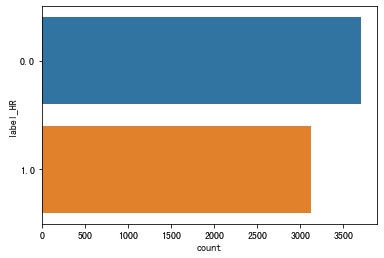

In [20]:
sns.countplot(y='label_HR',data=HR_df)

In [22]:
HR_df.corr()[['label_HR']].sort_values('label_HR',ascending = False)

,label_HR
label_HR,1.000000
max_dbz_bbox,0.307927
total_vil,0.307796
max_dbz_bbox_three,0.294340
max_dbz_bbox_eight,0.286631
area,0.285055
eccentricity,0.060561
diff_max_dbz_bbox_three,0.001922
diff_highest_dbz,-0.006566
diff_total_vil,-0.032430


In [23]:
# 删除不相关的 特征值
HR_df.drop(columns=['storm_type','max_dbz_index'],inplace=True)

In [24]:
HR_df.head()

,area,diff_highest_dbz,diff_max_dbz_bbox_three,diff_total_vil,eccentricity,max_dbz_bbox,max_dbz_bbox_eight,max_dbz_bbox_three,total_vil,label_HR
0,98.0,-2.0,-0.49,-0.66,0.89,51.47,34.92,51.47,11.89,0.0
1,1144.0,0.0,-0.22,-1.74,0.95,46.58,28.16,41.32,4.72,0.0
2,507.0,0.0,0.00,3.92,0.86,55.00,48.46,55.00,30.55,1.0
3,86.0,0.0,-2.91,-4.26,0.92,48.56,34.65,48.56,7.63,0.0
4,588.0,-1.0,0.00,-7.18,0.78,55.00,44.53,55.00,23.37,1.0


In [25]:
HR_df.shape

(6829, 10)

In [518]:
# # 删除低方差特征
# # 1、实例化一个转换器类
# transfer = VarianceThreshold(threshold=1)
# # 2、调用fit_transform
# storm_arr = transfer.fit_transform(storm_df.iloc[:, :9])
# print("删除低方差特征的结果：\n", storm_arr)
# print("形状：\n", storm_arr.shape)

# storm_l_df = pd.DataFrame(storm_arr)
# storm_l_df

In [43]:
HR_df.columns

Index(['area', 'diff_highest_dbz', 'diff_max_dbz_bbox_three', 'diff_total_vil',
       'eccentricity', 'max_dbz_bbox', 'max_dbz_bbox_eight',
       'max_dbz_bbox_three', 'total_vil', 'label_HR'],
      dtype='object')

In [171]:
# 2.3 分割数据
# x = storm_l_df
# x = HR_df.iloc[:,:HR_df.shape[1]-1]
x = HR_df.loc[:,['area', 'diff_max_dbz_bbox_three',
       'eccentricity', 'max_dbz_bbox', 'max_dbz_bbox_eight',
       'max_dbz_bbox_three', 'total_vil']]
y = HR_df['label_HR']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=22)

In [172]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [173]:
# # 3.特征工程(标准化)
# transfer = StandardScaler()
# x_train = transfer.fit_transform(x_train)
# x_test = transfer.transform(x_test)

In [174]:
# # 机器学习(逻辑回归)
# estimator = LogisticRegression()
# estimator.fit(x_train, y_train)

# 用随机森林预测
rf = RandomForestClassifier()
# 网格搜索与交叉验证
param = {'n_estimators':[10,20,30,50,80,120],'max_depth':[2,3,4,5,8]}
estimator = GridSearchCV(rf,param_grid=param,cv=3)
# 进行训练
estimator.fit(x_train,y_train)

# # KNN
# # 超参数的选择超参数
# estimator = KNeighborsClassifier(n_neighbors=50)
# # param_dict = {"n_neighbors": [30,32,34,36,38,40]}
# # estimator = GridSearchCV(estimator, param_grid=param_dict, cv=6)
# estimator.fit(x_train, y_train)

# print("在交叉验证中验证的最好结果：\n", estimator.best_score_)
# print("最好的参数模型：\n", estimator.best_estimator_)
# print("每次交叉验证后的准确率结果：\n", estimator.cv_results_)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [175]:
# 模型评估
y_predict = estimator.predict(x_test)
y_predict
print('预测准确率为:',estimator.score(x_test, y_test))
error = mean_absolute_error(y_test, y_predict)
print("平均绝对误差为:", error)

预测准确率为: 0.7354807223035628
平均绝对误差为: 0.2645192776964373


In [176]:
fpr,tpr,threshold = roc_curve(y_test,y_predict)

In [177]:
roc_auc = auc(fpr,tpr)
roc_auc


0.7349502724756274

#### 所有真实为降雨的天气中，预测为降雨占的比例为0.73

In [178]:
ret = classification_report(y_test, y_predict, labels=(0,1), target_names=("其他天气", "短时强降雨天气"))
print(ret)

              precision    recall  f1-score   support

        其他天气       0.77      0.74      0.76      1131
     短时强降雨天气       0.70      0.73      0.71       918

    accuracy                           0.74      2049
   macro avg       0.73      0.73      0.73      2049
weighted avg       0.74      0.74      0.74      2049



In [179]:
print("AUC 指标",roc_auc_score(y_test,y_predict))

AUC 指标 0.7349502724756274


In [138]:
# 各个特征值对标签的权重影响
HR_df.corr()[['label_HR']].sort_values('label_HR',ascending = False)

,label_HR
label_HR,1.000000
max_dbz_bbox,0.307927
total_vil,0.307796
max_dbz_bbox_three,0.294340
max_dbz_bbox_eight,0.286631
area,0.285055
eccentricity,0.060561
diff_max_dbz_bbox_three,0.001922
diff_highest_dbz,-0.006566
diff_total_vil,-0.032430


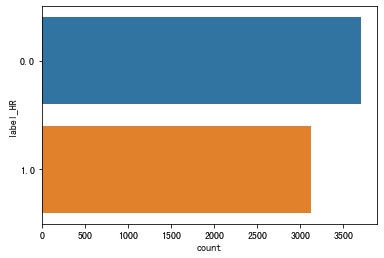

In [139]:
# 天气类型数目统计
sns.countplot(y='label_HR',data=HR_df)

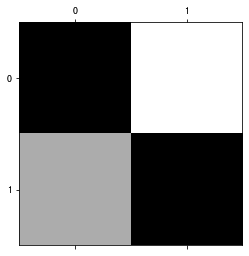

In [140]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,y_predict)
#显示预测犯错误的地方
row_sums=np.sum(cfm,axis=1)  #求出混淆矩阵每一行的和
error_matrix=cfm/row_sums   #求出每一行中每一个元素所占这一行的百分比
#将矩阵中对角线上的元素都定位0
np.fill_diagonal(error_matrix,0)
plt.matshow(error_matrix,cmap=plt.cm.gray)
plt.show()

### 结果分析

#### 真实天气为普通天气，而预测为特殊天气错误率高
#### 真实天气为特殊天气中，预测结果为特殊天气占的比例约为73%